AUC (manual) = 0.9947


C:\Users\71485\AppData\Local\Temp\ipykernel_12580\1899518495.py:40: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  manual_auc = np.trapz(TPR, FPR)


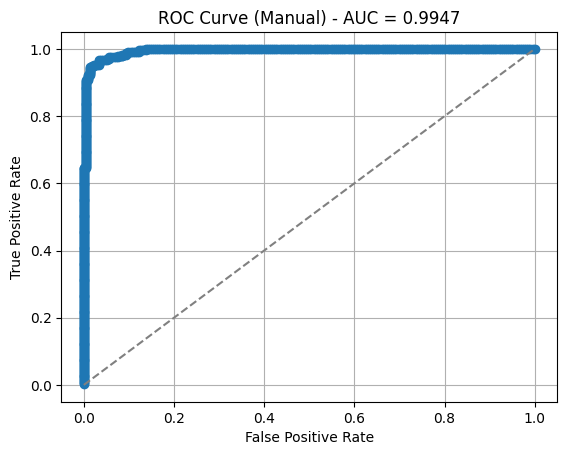

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
#X: ciri-ciri pasien
#y: labelnya, 0 sehat, 1 kanker

# Fit model
#solver = metode matematika yang dipakai untuk cari solusi terbaik(parameter model)
clf = LogisticRegression(solver="newton-cholesky", random_state=0).fit(X, y)

# Ambil probabilitas prediksi (positif class)
score = clf.predict_proba(X)[:, 1]

# Urutkan semua skor prediksi secara descending untuk thresholding
#Kalau anggap pasien dengan skor ≥ 0.9 itu kanker, hasilnya gimana?
thresholds = np.sort(score)[::-1]

TPR = []
FPR = []

P = np.sum(y == 1) # jumlah pasien yang beneran kena kanker
N = np.sum(y == 0) # jumlah pasien yang beneran sehat

for thresh in thresholds:
    TP = FP = 0
    for i in range(len(score)): # model bilang ini kanker
        if score[i] >= thresh:  # dan ternyata emang kanker
            if y[i] == 1:
                TP += 1
            else:                # tapi ternyata orangnya sehat
                FP += 1
    TPR.append(TP / P)
    FPR.append(FP / N)

# Konversi ke array
TPR = np.array(TPR)
FPR = np.array(FPR)

# Hitung AUC secara manual pakai metode trapezoid
manual_auc = np.trapz(TPR, FPR)

print(f"AUC (manual) = {manual_auc:.4f}")

# (Opsional) Plot ROC Curve
plt.plot(FPR, TPR, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (Manual) - AUC = {manual_auc:.4f}')
plt.grid(True)
plt.show()